In [102]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import pandas as pd
import numpy as np
import pkg_resources
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
#@title
# Adds the given score examples to the dataset.
# model_scores: scores to add under the 'model_score' column.
# label: whether these examples are toxic (True) or non toxic (False).
# identity: the identity subgroup for these examples.
# terms: all identities, to help with "identity" column hack.
def add_examples(data, model_scores, label, identity, terms):
  num_comments_added = len(model_scores)
  data['model_score'].extend(model_scores)
  data['label'].extend([label for a in range(num_comments_added)])
  data['identity'].extend([identity for a in range(num_comments_added)])
  
  for term in terms:
    data[term].extend([identity==term for a in range(num_comments_added)])

In [104]:
#@title
# truncated random distribtion, to fit within 0-1 range. https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.truncnorm.html
def scores(mean, num_comments, std=0.05):
  lower, upper = 0, 1.0
  return stats.truncnorm.rvs(
    (lower - mean) / std, (upper - mean) / std, loc=mean, scale=std, size=num_comments)

In [105]:
#@title
# pretty histograms
def plot_ranges(df, filename):
  g = sns.FacetGrid(df, row='identity', hue="label", palette="cubehelix")
  g = (g.map(sns.distplot, "model_score", hist=True, rug=False, kde=False, bins=100))
  g.savefig(filename)

In [106]:
def display_metrics(df):
  results = model_bias_analysis.compute_bias_metrics_for_models(df, ['subgroup'], ['model_score'], 'label')
  model_bias_analysis.plot_auc_heatmap(results, ['model_score'])
  model_bias_analysis.plot_aeg_heatmap(results, ['model_score'])

In [107]:
#@title
terms = ['background', 'subgroup']
NUM_COMMENTS = 1000

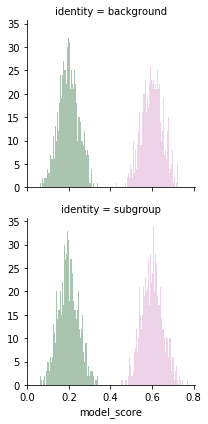

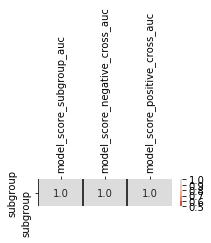

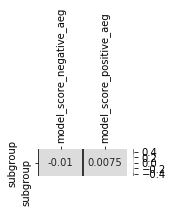

In [108]:
#@title
# No bias
no_bias_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(no_bias_data, scores(0.6, NUM_COMMENTS), True, 'background', terms)
add_examples(no_bias_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(no_bias_data, scores(0.6, NUM_COMMENTS), True, 'subgroup', terms)
add_examples(no_bias_data, scores(0.2, NUM_COMMENTS), False, 'subgroup', terms)

no_bias_df = pd.DataFrame(no_bias_data)
plot_ranges(no_bias_df, '/tmp/no_bias.png')
display_metrics(no_bias_df)

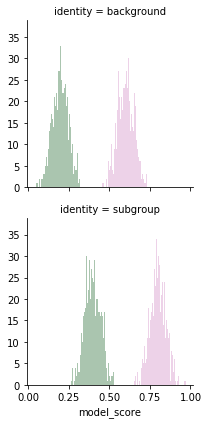

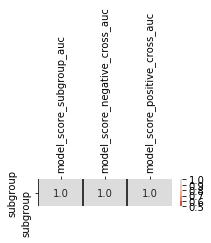

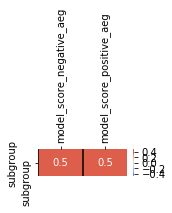

In [109]:
#@title
# Small score shift bias
small_score_shift_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(small_score_shift_data, scores(0.6, NUM_COMMENTS), True, 'background', terms)
add_examples(small_score_shift_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(small_score_shift_data, scores(0.8, NUM_COMMENTS), True, 'subgroup', terms)
add_examples(small_score_shift_data, scores(0.4, NUM_COMMENTS), False, 'subgroup', terms)

small_score_shift_df = pd.DataFrame(small_score_shift_data)
plot_ranges(small_score_shift_df, '/tmp/small_score_shift.png')
display_metrics(small_score_shift_df)

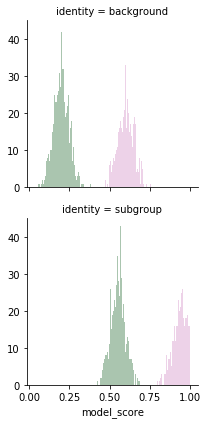

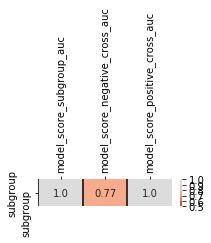

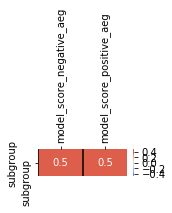

In [110]:
#@title
# Large score shift bias
large_score_shift_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(large_score_shift_data, scores(0.6, NUM_COMMENTS), True, 'background', terms)
add_examples(large_score_shift_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(large_score_shift_data, scores(0.95, NUM_COMMENTS), True, 'subgroup', terms)
add_examples(large_score_shift_data, scores(0.55, NUM_COMMENTS), False, 'subgroup', terms)

large_score_shift_df = pd.DataFrame(large_score_shift_data)
plot_ranges(large_score_shift_df, '/tmp/large_score_shift.png')
display_metrics(large_score_shift_df)

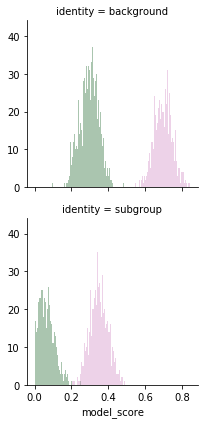

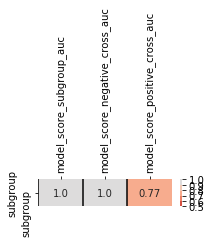

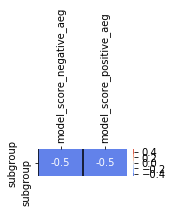

In [111]:
#@title
# Large Left score shift bias
large_score_shift_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(large_score_shift_data, scores(0.7, NUM_COMMENTS), True, 'background', terms)
add_examples(large_score_shift_data, scores(0.3, NUM_COMMENTS), False, 'background', terms)

add_examples(large_score_shift_data, scores(0.35, NUM_COMMENTS), True, 'subgroup', terms)
add_examples(large_score_shift_data, scores(0.05, NUM_COMMENTS), False, 'subgroup', terms)

large_score_shift_df = pd.DataFrame(large_score_shift_data)
plot_ranges(large_score_shift_df, '/tmp/large_left_score_shift.png')
display_metrics(large_score_shift_df)

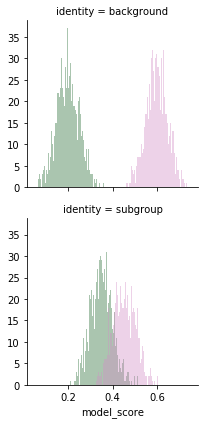

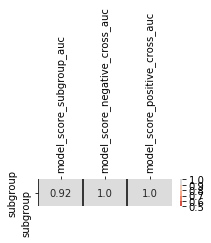

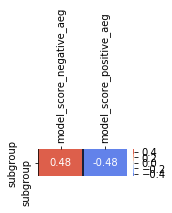

In [112]:
#@title
# Within group quality
low_quality_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(low_quality_data, scores(0.6, NUM_COMMENTS), True, 'background', terms)
add_examples(low_quality_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(low_quality_data, scores(0.45, NUM_COMMENTS), True, 'subgroup', terms)
add_examples(low_quality_data, scores(0.35, NUM_COMMENTS), False, 'subgroup', terms)

low_quality_df = pd.DataFrame(low_quality_data)
plot_ranges(low_quality_df, '/tmp/low_perf_subgroup.png')
display_metrics(low_quality_df)

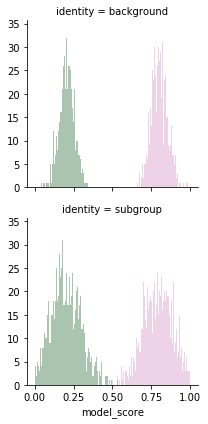

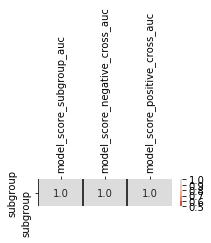

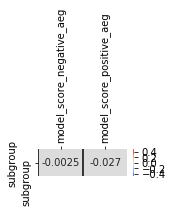

In [113]:
#@title
# Distribution shape bias
dist_shape_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(dist_shape_data, scores(0.8, NUM_COMMENTS), True, 'background', terms)
add_examples(dist_shape_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(dist_shape_data, scores(0.8, NUM_COMMENTS, std=0.1), True, 'subgroup', terms)
add_examples(dist_shape_data, scores(0.2, NUM_COMMENTS, std=0.1), False, 'subgroup', terms)

dist_shape_df = pd.DataFrame(dist_shape_data)
plot_ranges(dist_shape_df, '/tmp/wider_dist.png')
display_metrics(dist_shape_df)

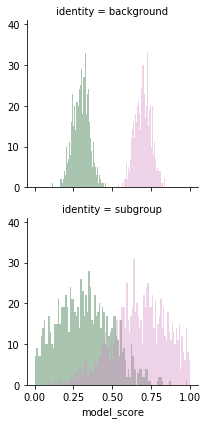

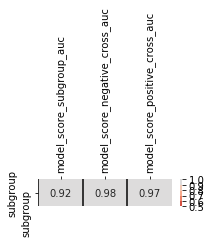

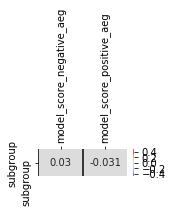

In [114]:
#@title
# Distribution shape bias
dist_shape_overlap_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(dist_shape_overlap_data, scores(0.7, NUM_COMMENTS), True, 'background', terms)
add_examples(dist_shape_overlap_data, scores(0.3, NUM_COMMENTS), False, 'background', terms)

add_examples(dist_shape_overlap_data, scores(0.7, NUM_COMMENTS, std=0.2), True, 'subgroup', terms)
add_examples(dist_shape_overlap_data, scores(0.3, NUM_COMMENTS, std=0.2), False, 'subgroup', terms)

dist_shape_overlap_df = pd.DataFrame(dist_shape_overlap_data)
plot_ranges(dist_shape_overlap_df, '/tmp/even_wider_dist.png')
display_metrics(dist_shape_overlap_df)

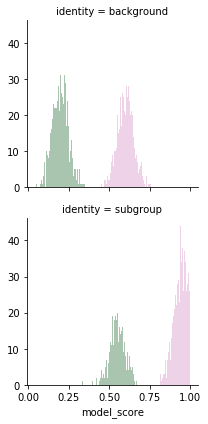

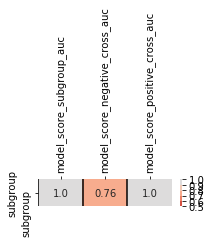

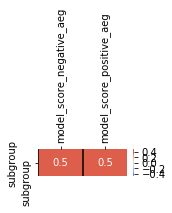

In [115]:
#@title
# Large score shift bias
large_score_shift_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(large_score_shift_data, scores(0.6, NUM_COMMENTS), True, 'background', terms)
add_examples(large_score_shift_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(large_score_shift_data, scores(0.95, 1500), True, 'subgroup', terms)
add_examples(large_score_shift_data, scores(0.55, 500), False, 'subgroup', terms)

large_score_shift_df = pd.DataFrame(large_score_shift_data)
plot_ranges(large_score_shift_df, '/tmp/score_shift_size_skew_t.png')
display_metrics(large_score_shift_df)

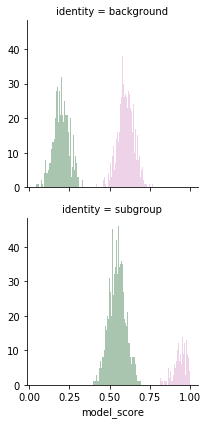

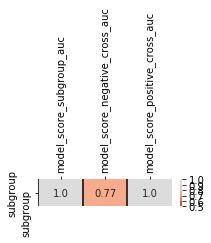

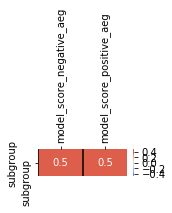

In [116]:
#@title
# Large score shift bias
large_score_shift_data = {'model_score': [], 'label': [], 'background': [], 'subgroup': [], 'identity': []} 
add_examples(large_score_shift_data, scores(0.6, NUM_COMMENTS), True, 'background', terms)
add_examples(large_score_shift_data, scores(0.2, NUM_COMMENTS), False, 'background', terms)

add_examples(large_score_shift_data, scores(0.95, 500), True, 'subgroup', terms)
add_examples(large_score_shift_data, scores(0.55, 1500), False, 'subgroup', terms)

large_score_shift_df = pd.DataFrame(large_score_shift_data)
plot_ranges(large_score_shift_df, '/tmp/score_shift_size_skew_n.png')
display_metrics(large_score_shift_df)